1. Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

2. Loading Train, Validation and Test Images Dataset

In [2]:
BATCH_SIZE = 8
PIC_SIZE = 256

train_data = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255, rotation_range=20,
                                                            width_shift_range = 0.1,
                                                            height_shift_range = 0.1, shear_range= 15,
                                                            zoom_range= [0.5, 1.5])

validation_data = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

train = train_data.flow_from_directory("./data/train", target_size=(PIC_SIZE,PIC_SIZE), batch_size=BATCH_SIZE, class_mode="binary", color_mode='rgb')
validation = validation_data.flow_from_directory("./data/test", target_size=(PIC_SIZE,PIC_SIZE), batch_size=BATCH_SIZE, class_mode="binary", color_mode='rgb')

print(train.class_indices)
print(validation.class_indices)

Found 1148 images belonging to 2 classes.
Found 545 images belonging to 2 classes.
{'benign': 0, 'malignant': 1}
{'benign': 0, 'malignant': 1}


3. Model Structure

In [3]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(PIC_SIZE, PIC_SIZE, 3), kernel_initializer = "he_normal", strides=1,
padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(3, 3), padding="same"))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu',  kernel_regularizer = tf.keras.regularizers.l2(0.01), kernel_initializer = "he_normal", strides=1,
padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(3, 3), padding="same"))
model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu',  kernel_regularizer = tf.keras.regularizers.l2(0.01), kernel_initializer = "he_normal", strides=1,
padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(3, 3), padding="same"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.01), kernel_initializer = "he_normal"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(256, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.01), kernel_initializer = "he_normal"))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(64, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.01), kernel_initializer = "he_normal"))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

4. Compiling the Model

In [4]:
tensor_board = tf.keras.callbacks.TensorBoard(log_dir="logs/model")

model.compile(
    optimizer=tf.keras.optimizers.experimental.Nadam(learning_rate=0.001),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=["acc"]
)

5. Training the Model

In [5]:
history = model.fit(train, 
    epochs=30, 
    validation_data=validation,
    callbacks=[tensor_board])

print("Model Trained")

Epoch 1/30
144/144 [==============================] - 88s 571ms/step - loss: 9.1976 - acc: 0.7395 - val_loss: 4.4362 - val_acc: 0.8477
Epoch 2/30
144/144 [==============================] - 82s 569ms/step - loss: 3.0914 - acc: 0.8258 - val_loss: 2.3095 - val_acc: 0.7266
Epoch 3/30
144/144 [==============================] - 81s 559ms/step - loss: 1.7251 - acc: 0.8284 - val_loss: 1.3283 - val_acc: 0.8477
Epoch 4/30
144/144 [==============================] - 82s 568ms/step - loss: 1.1409 - acc: 0.8275 - val_loss: 1.0030 - val_acc: 0.8239
Epoch 5/30
144/144 [==============================] - 82s 566ms/step - loss: 0.8624 - acc: 0.8510 - val_loss: 0.8572 - val_acc: 0.7725
Epoch 6/30
144/144 [==============================] - 82s 566ms/step - loss: 0.7226 - acc: 0.8467 - val_loss: 0.7150 - val_acc: 0.8330
Epoch 7/30
144/144 [==============================] - 81s 565ms/step - loss: 0.6447 - acc: 0.8598 - val_loss: 0.6363 - val_acc: 0.8147
Epoch 8/30
144/144 [==============================] - 2

6. Model Accuracy

In [10]:
model.evaluate(validation)

69/69 [==============================] - 13s 183ms/step - loss: 0.4520 - acc: 0.8404


[0.4519677460193634, 0.8403669595718384]

7. Checking Loss and Accuracy with Tensorboard

In [7]:
%load_ext tensorboard

8. Testing the Model

1/1 [==============================] - 0s 54ms/step
[[0.]]
Benign


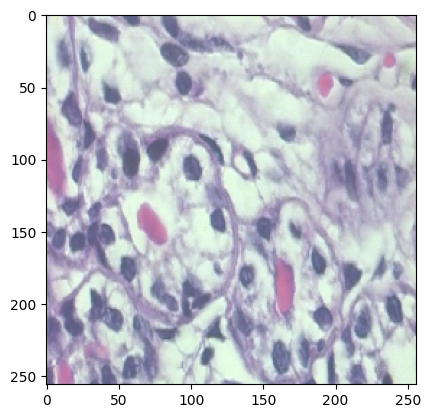

In [15]:
test_img = tf.keras.preprocessing.image.load_img("./data/test/benign/SOB_B_F-14-9133-400-005.png", target_size=(PIC_SIZE, PIC_SIZE), color_mode='rgb')

plt.imshow(test_img)

X = tf.keras.preprocessing.image.img_to_array(test_img)
X = np.expand_dims(X, axis = 0)

prediction = np.vstack([X])

result = model.predict(prediction)

print(result)

if result >= 0.75 :
    print("Malignant")
else :
    print("Benign")

9. Saving the whole Model

In [9]:
model.save("tumors_model.h5")